In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def getUniformSampleMean(N, a=0.0, b=1.0):
    return np.mean(a + np.random.rand(N) * (b-a))

def getExponentialSampleMean(N, scale=1.0):
    return np.mean(np.random.exponential(scale, size=N))

def getBetaSampleMean(N, alpha=1, beta=1):
    return np.mean(np.random.beta(alpha, beta, size=N))

def getGeometricSampleMean(N, p=0.5):
    return np.mean(np.random.geometric(p, size=N))

def getPoissonSampleMean(N, lam=1.0):
    return np.mean(np.random.poisson(lam, size=N))

In [35]:
def plotDistribution(dist, title=''):
    N = [[1, 10],
        [30, 100],
        [300, 1000]]

    fig, axes = plt.subplots(3, 2, figsize=(18,12))

    for row_num in range(3):
        for col_num in range(2):
            ax = axes[row_num][col_num]
            num_trials = N[row_num][col_num]
            data = [dist(num_trials) for _ in range(10000)]
            print(num_trials, np.mean(data), np.var(data))
            
            ax.hist(data, bins=100)
            ax.set_title(f'N={num_trials}')
    
    fig.suptitle(title)

1 0.5000333213574131 0.0835239059237832
10 0.5004122926650912 0.008228221006106304
30 0.4998565945177823 0.002736808434700503
100 0.5000993231361551 0.0008439331418089907
300 0.5001379977348458 0.00027470917591635764
1000 0.5000606537903071 8.479895595248557e-05


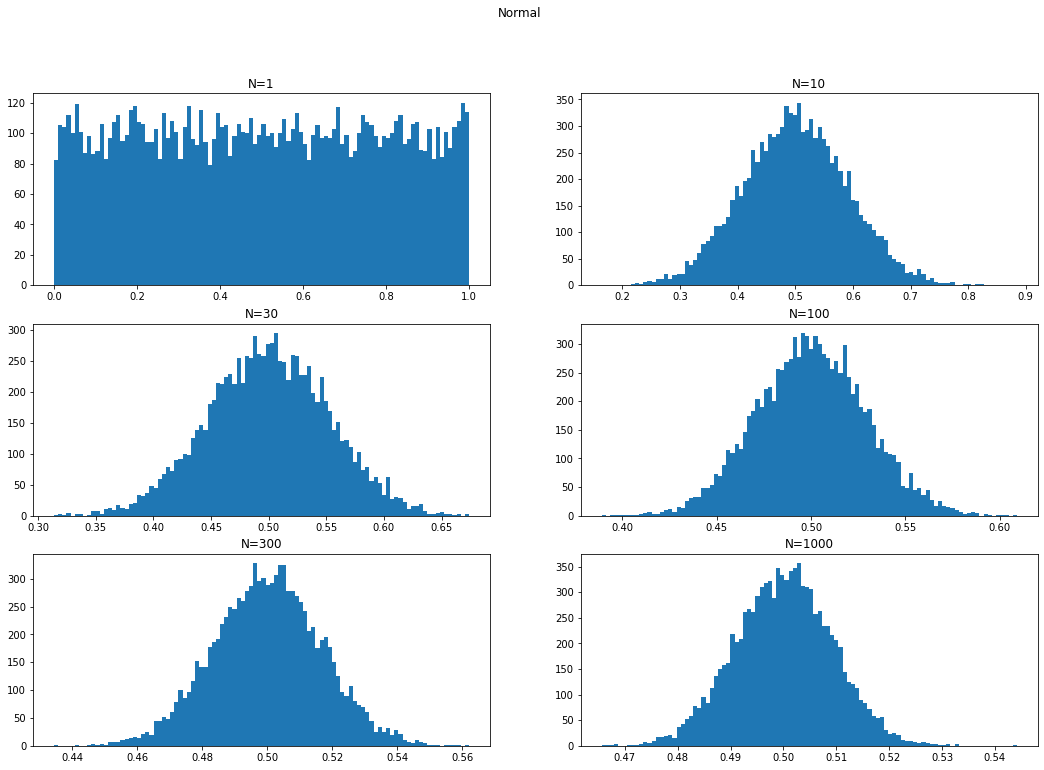

In [36]:
plotDistribution(getUniformSampleMean, 'Normal')

1 1.0052981851633875 0.9823631078358427
10 1.005395816682922 0.10293521591085043
30 0.9999454579155704 0.03330343798242977
100 0.9989484359270627 0.009965860754997755
300 0.999091717911338 0.003314013652912593
1000 0.9997022393256048 0.0010230917927085863


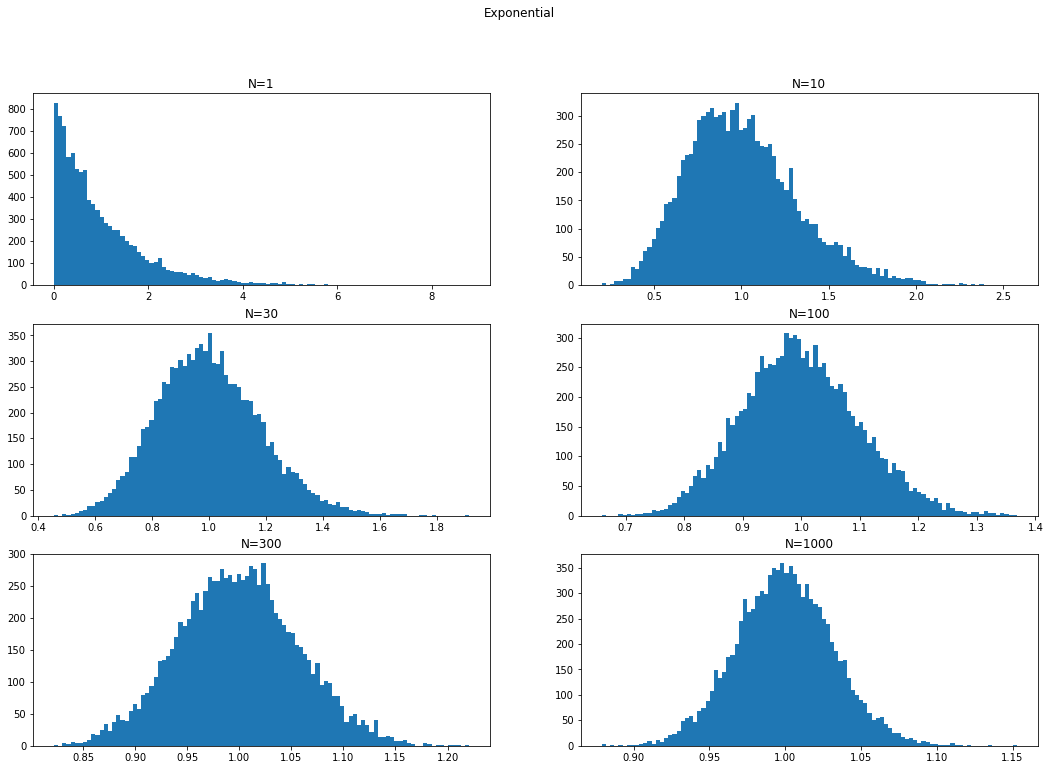

In [37]:
plotDistribution(getExponentialSampleMean, 'Exponential')

1 0.2864535402440951 0.025597807804794592
10 0.2854565578504167 0.0025414929231518863
30 0.28520112159692634 0.0008577348042504379
100 0.28572830160867013 0.0002562968702604639
300 0.28568194073064435 8.562910959075439e-05
1000 0.28580566238274624 2.5991983678210805e-05


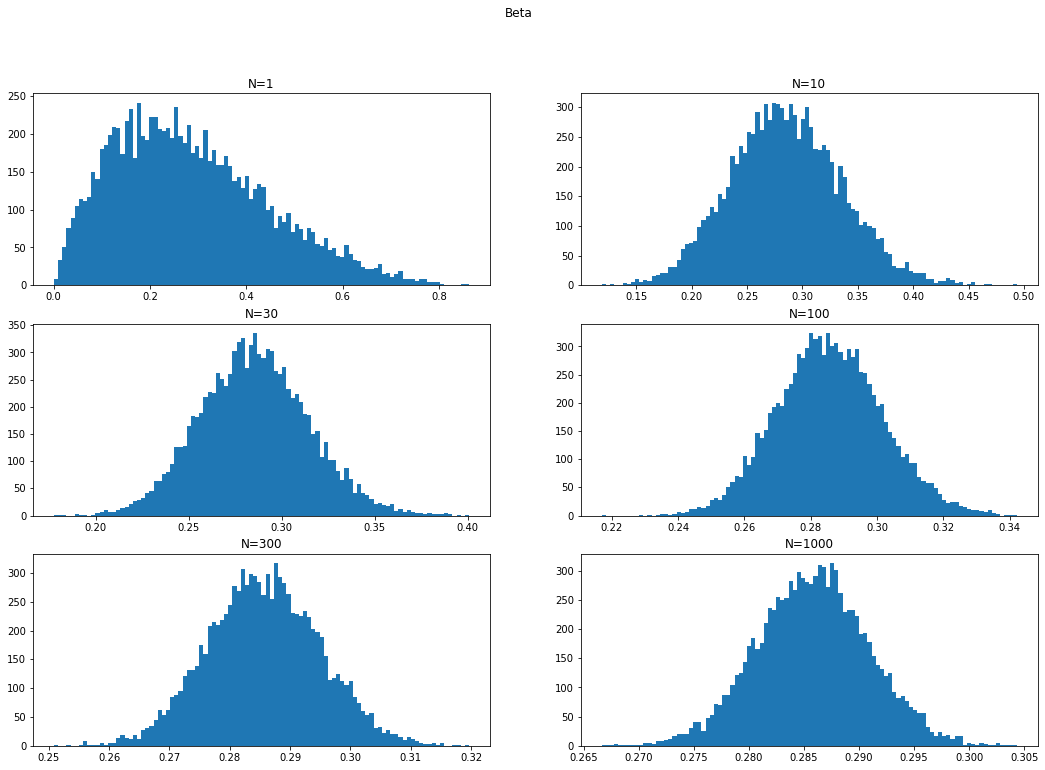

In [43]:
plotDistribution(lambda N: getBetaSampleMean(N, alpha=2, beta=5), 'Beta')

1 4.9255 19.25494975
10 4.987660000000001 1.9910537244
30 5.007016666666666 0.6634622108333333
100 4.998167 0.196090250111
300 4.997564666666666 0.06702968915155555
1000 5.000475300000001 0.02009616138991


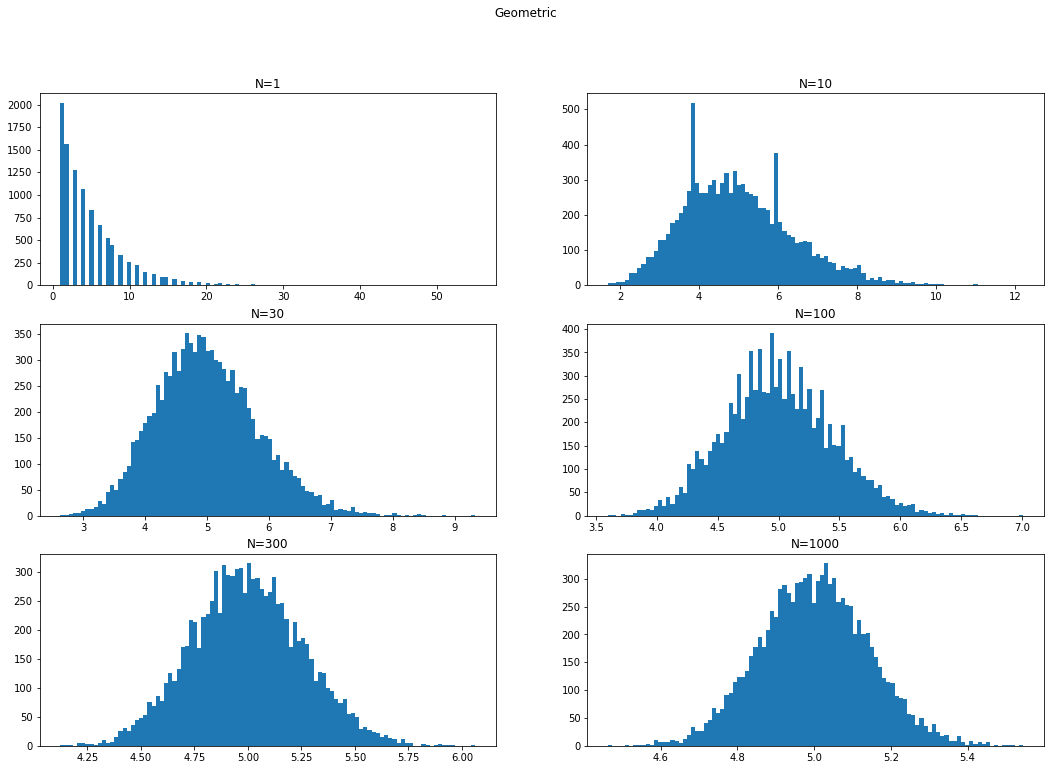

In [46]:
plotDistribution(lambda N: getGeometricSampleMean(N, p=0.2), 'Geometric')

1 5.0169 5.001014390000001
10 4.99791 0.5025526319
30 5.00027 0.16699537154444444
100 4.999765000000001 0.049728794775
300 4.99884 0.016432487733333334
1000 5.0003411 0.00496502355079


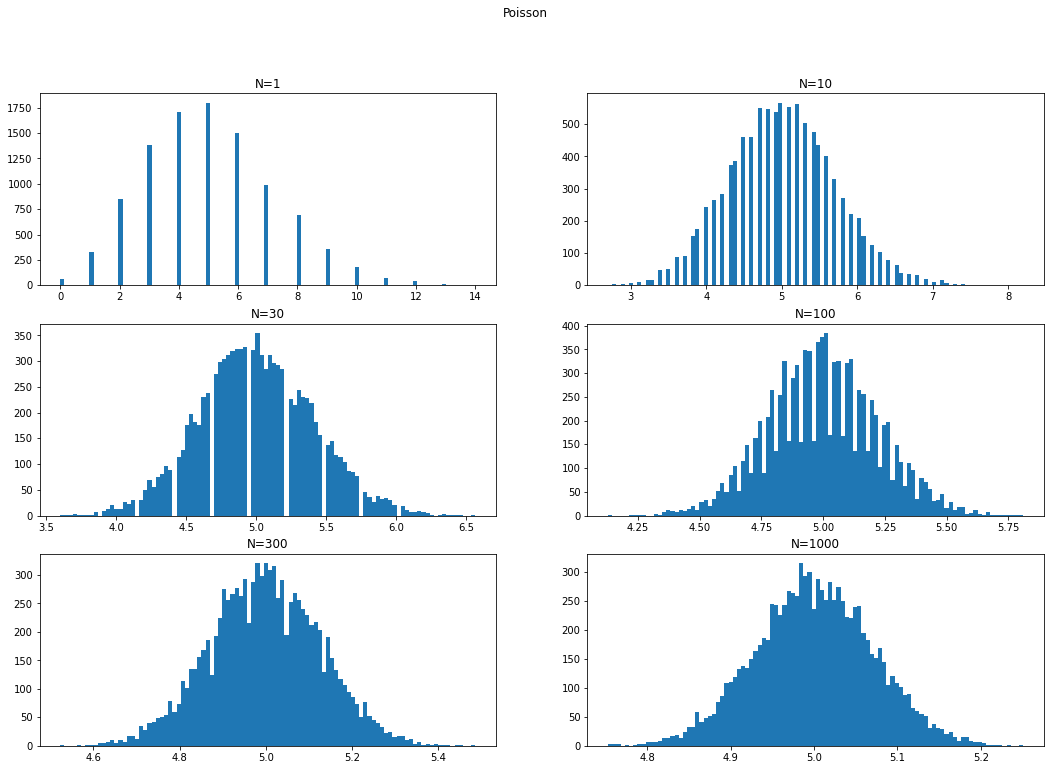

In [48]:
plotDistribution(lambda N: getPoissonSampleMean(N, lam=5), 'Poisson')

For all the distributions tested so far, $N=30$ seems to be sufficient for the sample means to be approximated by a normal distribution. The mean of this distribution should tend to $\mu$ (the population mean), and the variance should tend to $\dfrac{\sigma^2}{N}$.